In [63]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/'

In [10]:
list_of_files = []

In [27]:
for dirpath, dirnames, filenames in os.walk(path):
    for filename in filenames:
         print("/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/:", os.path.join(dirpath, filename))

/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/: /mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/: /mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/: /mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/: /mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sheleg/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-e

In [28]:
list_of_dfs = []

In [29]:
for i in list_of_files:
    df_tmp = pd.read_csv(i, usecols=['product_id', 'quantity'])
    df_tmp['name'] = i.split(sep='/')[-2]
    df_tmp['date'] = i.split(sep='/')[-3]
    list_of_dfs.append(df_tmp)

In [30]:
df = pd.concat(list_of_dfs) 
df.quantity.sum()

480

In [20]:
df

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07


In [37]:
df.groupby(['name'], as_index = False) \
.agg({'quantity' : 'sum'}) \

,name,quantity
0,Alexey_Fedorov,24
1,Alexey_Ivanov,17
2,Alexey_Petrov,7
3,Alexey_Smirnov,52
4,Anton_Ivanov,23
5,Anton_Petrov,18
6,Anton_Smirnov,45
7,Kirill_Fedorov,28
8,Kirill_Petrov,9
9,Kirill_Smirnov,17


In [81]:
z = df.groupby(['product_id'], as_index = False) \
.agg({'quantity':'sum'}) \

In [82]:
z

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10
...,...,...
66,94,13
67,95,3
68,96,5
69,97,3


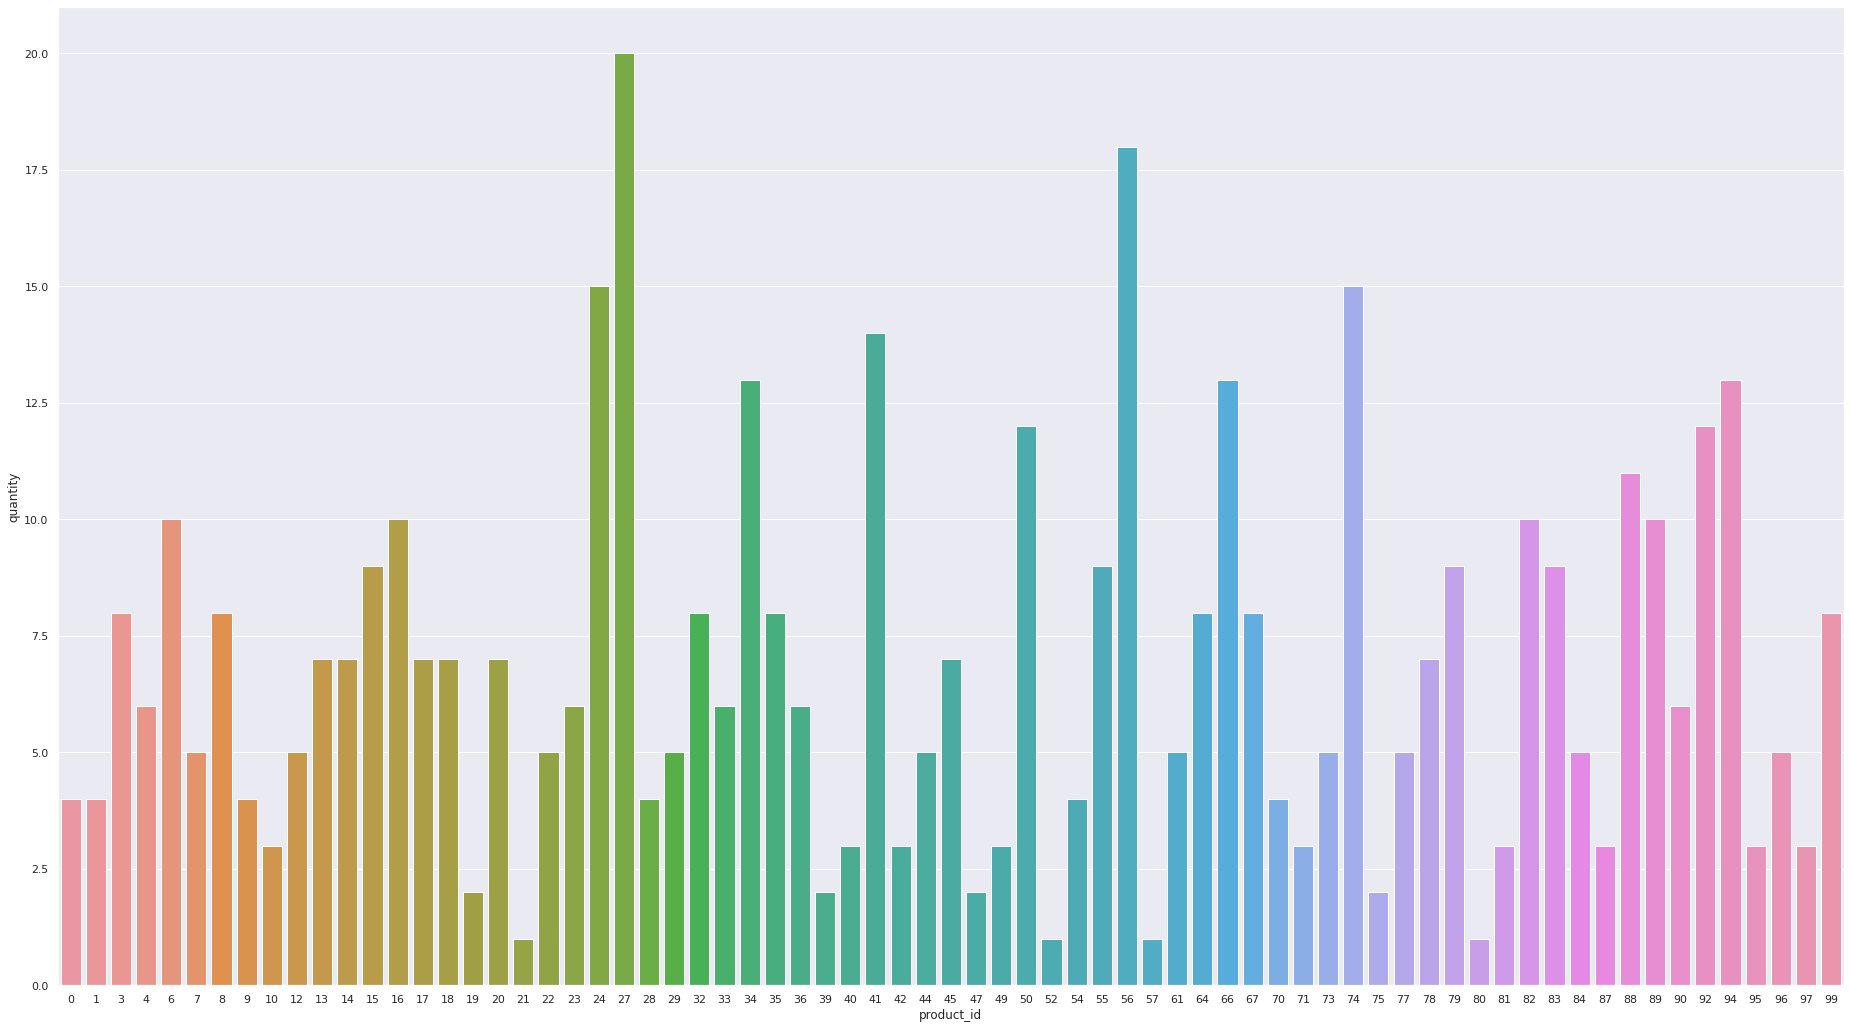

In [96]:
plt.figure(figsize=(32,18))
sns.barplot(x=z.product_id, y=z.quantity)

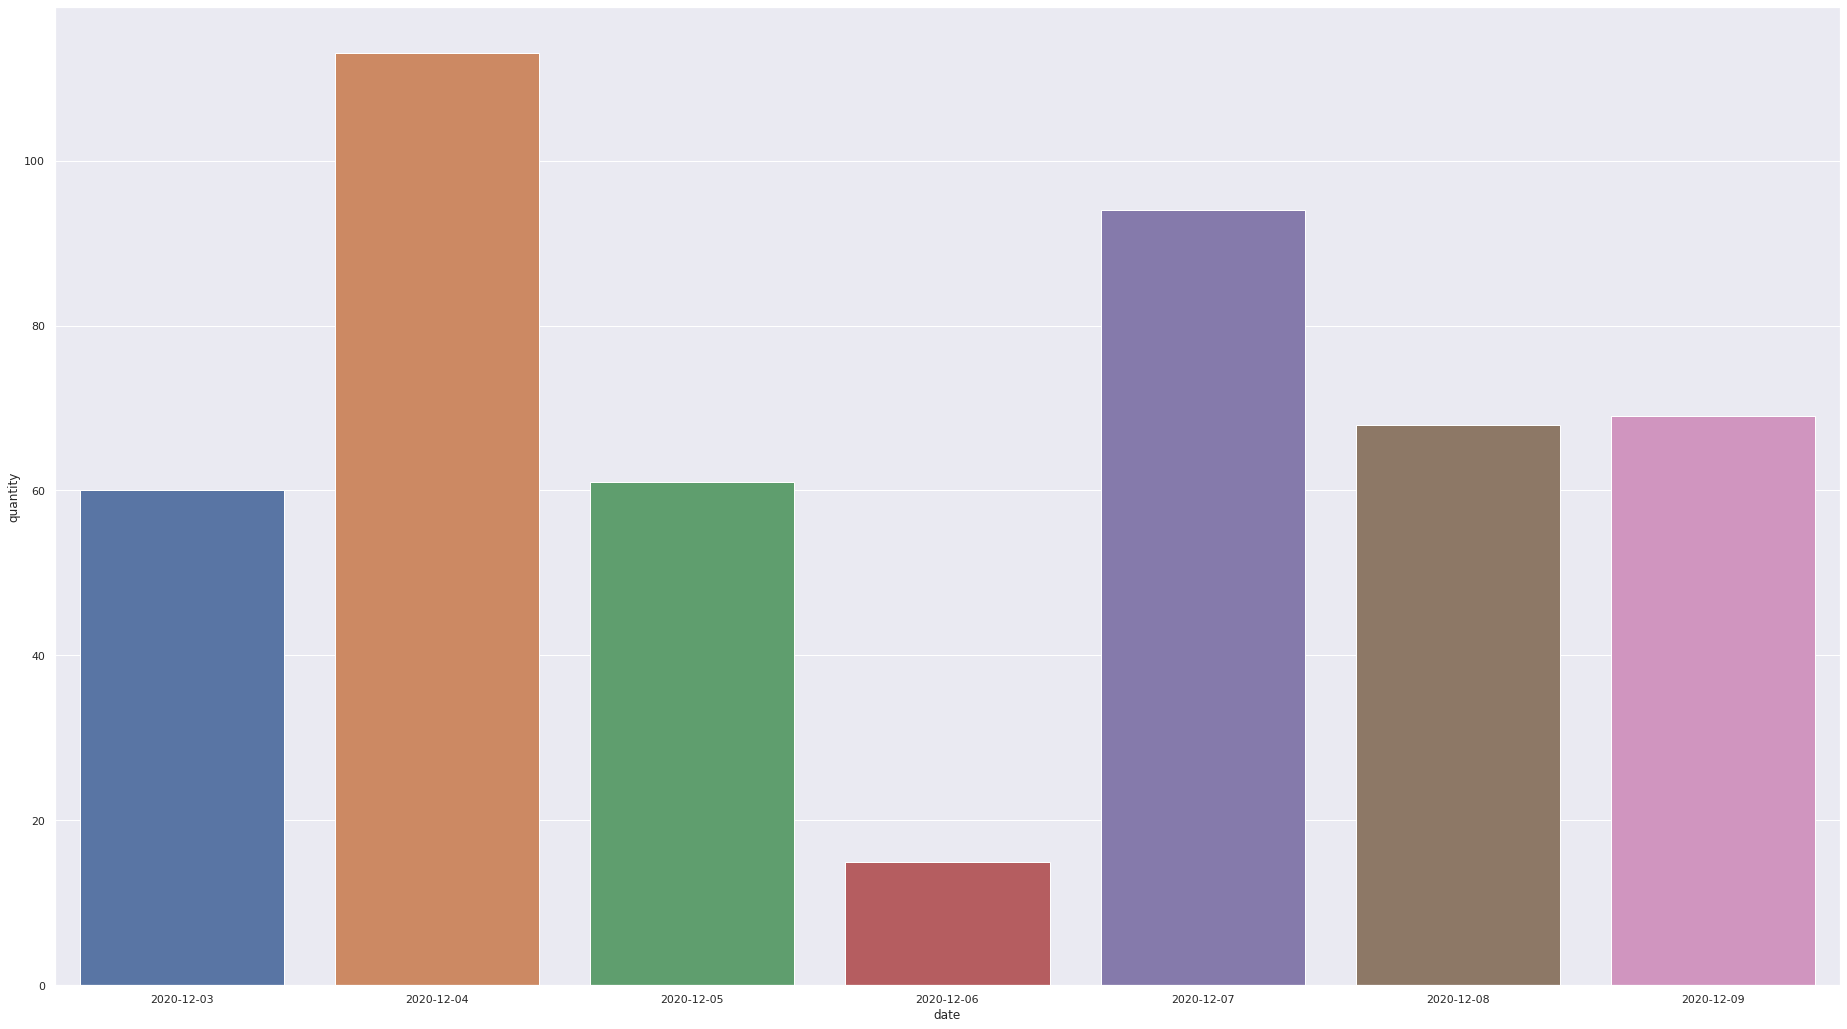

In [97]:
l = df.groupby(['date'], as_index = False) \
.agg({'quantity':'sum'})
plt.figure(figsize=(32,18))
sns.barplot(x='date', y='quantity', data=l)

In [101]:
ndf = df.drop_duplicates(subset = ['name', 'product_id', 'date'])

In [102]:
ndf

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07


In [110]:
ndf.groupby(['name', 'product_id'], as_index = False) \
.agg({'quantity':'count'}) \
.query('quantity > 1')

,name,product_id,quantity
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
